In [1]:
import re
import numpy as np
from matplotlib import pyplot as plt

In [2]:
input='p=98,102 v=52,-49\np=36,69 v=19,-95\np=32,43 v=23,1\np=53,78 v=-68,-28\np=57,68 v=58,99\np=55,75 v=13,83\np=71,101 v=33,93\np=13,92 v=-74,78\np=47,96 v=66,-70\np=89,12 v=39,-13\np=100,64 v=43,-78\np=47,91 v=13,-88\np=14,87 v=38,40\np=66,17 v=65,23\np=0,67 v=-27,-16\np=71,17 v=-24,25\np=97,30 v=-13,-77\np=62,7 v=11,-26\np=43,62 v=-57,-71\np=78,66 v=79,-34\np=62,54 v=-90,7\np=98,98 v=64,21\np=34,2 v=-23,-80\np=16,94 v=-67,59\np=66,70 v=-76,-65\np=92,54 v=-48,-11\np=48,30 v=-66,-66\np=82,24 v=-40,67\np=39,89 v=54,65\np=37,102 v=84,52\np=70,95 v=36,57\np=9,80 v=-70,75\np=1,1 v=-9,-70\np=4,99 v=-73,79\np=64,61 v=-21,-5\np=88,67 v=42,-83\np=44,1 v=91,-20\np=8,85 v=38,9\np=67,57 v=83,62\np=20,74 v=38,81\np=76,23 v=72,-19\np=90,99 v=-91,-21\np=99,12 v=-99,22\np=49,65 v=19,13\np=74,48 v=93,44\np=73,97 v=21,27\np=15,95 v=72,-15\np=94,65 v=71,-90\np=13,58 v=71,-96\np=38,0 v=74,71\np=81,89 v=75,5\np=40,15 v=8,-87\np=45,83 v=48,-40\np=66,87 v=-7,33\np=67,40 v=-83,-36\np=73,9 v=-22,-56\np=52,25 v=21,56\np=50,78 v=98,99\np=96,31 v=64,-12\np=88,19 v=-37,-98\np=15,90 v=99,88\np=86,101 v=-80,-75\np=27,90 v=-64,87\np=33,83 v=-49,-70\np=87,38 v=-81,23\np=6,4 v=60,-50\np=61,38 v=-37,-10\np=3,36 v=-77,-91\np=25,1 v=46,-11\np=87,97 v=-87,41\np=26,35 v=-31,67\np=85,8 v=-48,60\np=14,96 v=92,-99\np=25,46 v=52,73\np=29,75 v=-10,-21\np=56,62 v=13,-50\np=14,58 v=12,-98\np=8,71 v=-85,32\np=87,52 v=64,-78\np=80,68 v=46,-94\np=98,37 v=35,-79\np=97,11 v=-23,-26\np=59,71 v=76,38\np=61,27 v=-28,-20\np=83,46 v=50,98\np=5,34 v=-73,79\np=86,50 v=93,98\np=94,101 v=50,3\np=31,70 v=97,24\np=14,21 v=40,38\np=87,95 v=-6,-65\np=33,11 v=-78,-92\np=92,85 v=-35,82\np=75,46 v=-72,-65\np=98,55 v=64,7\np=38,66 v=8,-53\np=88,97 v=-62,-76\np=90,75 v=-29,-21\np=32,50 v=68,-25\np=2,98 v=24,-14\np=24,12 v=-34,-61\np=32,82 v=-92,3\np=72,96 v=94,-95\np=55,72 v=15,-77\np=84,77 v=3,99\np=80,78 v=-47,-10\np=79,36 v=-69,48\np=42,6 v=33,-93\np=72,2 v=-65,-8\np=51,84 v=26,94\np=15,17 v=31,-68\np=23,7 v=45,-14\np=52,14 v=-9,64\np=8,29 v=16,-73\np=100,59 v=-45,-41\np=21,63 v=52,14\np=9,48 v=-67,-60\np=89,8 v=-31,79\np=21,100 v=48,59\np=81,49 v=-58,19\np=1,77 v=24,57\np=25,34 v=5,73\np=20,101 v=-67,-2\np=86,36 v=28,-95\np=97,31 v=51,-7\np=76,20 v=83,-12\np=96,77 v=-8,-22\np=84,94 v=39,-69\np=11,10 v=-99,-26\np=100,23 v=-1,-13\np=20,50 v=16,-54\np=15,81 v=-66,88\np=27,62 v=-71,-72\np=70,56 v=90,81\np=10,45 v=-81,-66\np=100,51 v=24,-90\np=31,73 v=49,-59\np=56,5 v=92,7\np=45,28 v=-46,60\np=84,81 v=-6,28\np=89,60 v=-91,8\np=66,42 v=54,-42\np=71,101 v=-76,-93\np=31,76 v=26,-52\np=97,55 v=31,73\np=31,26 v=-96,41\np=79,4 v=-29,-87\np=65,21 v=29,36\np=3,102 v=-8,87\np=20,65 v=-60,-90\np=87,60 v=-98,86\np=57,13 v=16,87\np=66,95 v=-43,94\np=33,32 v=68,47\np=23,80 v=-51,-10\np=67,56 v=-30,71\np=36,58 v=-53,-29\np=57,63 v=-54,-64\np=6,30 v=46,-98\np=0,40 v=86,59\np=13,102 v=69,55\np=93,14 v=-30,29\np=34,7 v=45,-25\np=36,7 v=-46,-8\np=39,100 v=19,-69\np=25,59 v=-64,-36\np=20,14 v=52,59\np=12,44 v=-29,-11\np=45,71 v=12,7\np=2,29 v=75,-66\np=88,54 v=75,32\np=27,51 v=70,-48\np=88,85 v=-68,55\np=31,64 v=-55,-89\np=21,16 v=9,41\np=40,58 v=26,55\np=96,55 v=-39,-8\np=30,29 v=-71,30\np=74,80 v=65,-63\np=98,78 v=2,38\np=54,93 v=-62,-82\np=35,70 v=-31,32\np=73,17 v=-29,72\np=0,97 v=-88,-62\np=15,26 v=38,-43\np=20,76 v=-71,-58\np=0,63 v=24,68\np=21,24 v=42,31\np=78,68 v=97,63\np=79,44 v=79,-84\np=60,100 v=58,95\np=46,72 v=-7,-83\np=25,29 v=59,18\np=88,16 v=-24,-34\np=62,67 v=-54,14\np=58,35 v=-43,-12\np=40,34 v=80,7\np=32,90 v=-55,4\np=76,1 v=-40,22\np=87,4 v=-57,52\np=76,93 v=28,-75\np=69,49 v=36,92\np=66,79 v=-36,-28\np=58,63 v=-7,-16\np=97,30 v=82,18\np=44,10 v=37,-20\np=11,31 v=16,21\np=78,20 v=-72,96\np=72,56 v=-79,-4\np=44,81 v=-75,-27\np=76,51 v=43,8\np=84,81 v=14,-69\np=0,11 v=71,-50\np=92,51 v=70,-69\np=73,69 v=32,-77\np=63,66 v=-36,93\np=25,2 v=-49,-50\np=90,73 v=10,9\np=47,48 v=37,-48\np=87,5 v=-58,38\np=11,19 v=27,29\np=3,82 v=92,90\np=61,68 v=-84,-70\np=25,40 v=52,7\np=92,47 v=-86,-21\np=95,21 v=17,60\np=2,47 v=-30,49\np=18,5 v=-56,77\np=23,31 v=-85,-30\np=19,7 v=-38,5\np=37,25 v=-18,96\np=37,2 v=99,95\np=21,58 v=42,8\np=59,92 v=94,82\np=61,63 v=-18,-41\np=4,65 v=78,-83\np=40,71 v=-64,-76\np=82,25 v=61,66\np=50,15 v=-57,18\np=54,97 v=-61,-39\np=94,5 v=-30,4\np=14,80 v=16,-28\np=46,40 v=-10,49\np=95,49 v=32,74\np=77,45 v=14,-24\np=37,16 v=77,-39\np=62,35 v=22,-61\np=36,100 v=77,4\np=75,53 v=-26,54\np=63,43 v=25,-75\np=95,83 v=-48,-81\np=10,34 v=-99,-30\np=19,9 v=13,-49\np=27,81 v=-81,99\np=52,15 v=69,-1\np=19,4 v=-92,-19\np=72,87 v=-18,-88\np=88,94 v=28,76\np=71,57 v=65,-47\np=85,48 v=-76,26\np=39,16 v=-77,-57\np=74,97 v=-8,-39\np=57,74 v=-16,-87\np=83,40 v=86,61\np=14,26 v=39,88\np=100,22 v=-71,-81\np=35,25 v=-3,11\np=98,79 v=28,32\np=73,34 v=34,46\np=71,17 v=-25,50\np=69,78 v=-85,44\np=39,33 v=89,65\np=82,100 v=10,-51\np=14,43 v=84,42\np=14,41 v=38,-78\np=70,91 v=89,-20\np=80,61 v=31,53\np=1,58 v=71,-29\np=14,21 v=-63,-43\np=40,4 v=25,8\np=70,72 v=29,20\np=39,50 v=13,-62\np=9,70 v=-1,-47\np=95,31 v=-32,-63\np=15,64 v=-92,99\np=26,33 v=-58,-92\np=23,60 v=70,-47\np=5,50 v=-22,-32\np=5,12 v=-89,7\np=21,63 v=48,68\np=56,62 v=-29,-10\np=59,77 v=-36,-10\np=76,92 v=97,-81\np=63,6 v=-65,-93\np=5,58 v=5,56\np=17,24 v=-24,18\np=13,4 v=-92,-76\np=55,18 v=-61,-92\np=17,83 v=38,-70\np=71,41 v=63,-86\np=59,94 v=90,67\np=47,46 v=44,38\np=24,59 v=1,-65\np=36,69 v=72,-48\np=70,13 v=47,-50\np=78,11 v=54,-75\np=78,97 v=-51,82\np=66,37 v=-68,92\np=88,92 v=82,-15\np=29,28 v=46,-44\np=10,73 v=49,81\np=55,43 v=-79,79\np=45,57 v=-25,19\np=56,79 v=15,-28\np=35,81 v=98,14\np=16,12 v=20,41\np=86,60 v=-91,68\np=62,32 v=-92,-57\np=70,1 v=7,89\np=78,76 v=-40,-10\np=33,62 v=88,56\np=35,70 v=-17,-77\np=13,65 v=-26,35\np=45,57 v=62,-23\np=46,100 v=26,-12\np=79,24 v=75,5\np=12,78 v=53,-58\np=88,88 v=57,-75\np=8,70 v=74,8\np=78,40 v=29,24\np=16,2 v=59,52\np=100,84 v=-13,97\np=15,68 v=6,32\np=18,55 v=92,-35\np=26,11 v=63,-26\np=4,12 v=76,77\np=58,46 v=-72,-84\np=47,63 v=-90,-4\np=57,51 v=-46,79\np=37,26 v=84,-43\np=36,4 v=52,-33\np=99,74 v=17,-4\np=51,77 v=91,58\np=44,72 v=69,-73\np=77,14 v=54,-68\np=39,45 v=34,-24\np=8,29 v=-49,-60\np=38,34 v=-85,-7\np=96,68 v=-63,1\np=19,74 v=85,-85\np=29,61 v=7,-14\np=16,45 v=-38,-42\np=21,12 v=45,59\np=84,21 v=39,11\np=58,35 v=58,85\np=69,30 v=54,90\np=38,101 v=-28,-81\np=78,11 v=-22,-2\np=4,13 v=30,30\np=11,93 v=85,-39\np=10,53 v=25,88\np=40,23 v=-29,95\np=92,5 v=11,-12\np=74,32 v=43,-24\np=88,69 v=90,-85\np=57,34 v=22,96\np=37,19 v=62,67\np=15,28 v=-38,18\np=92,52 v=-8,-23\np=17,97 v=-9,-69\np=83,26 v=-87,48\np=56,35 v=40,90\np=10,90 v=64,-22\np=97,48 v=-19,7\np=57,100 v=33,28\np=12,14 v=-13,-79\np=17,1 v=-80,-32\np=35,97 v=-85,91\np=89,38 v=-41,13\np=8,11 v=-85,66\np=73,91 v=61,-3\np=100,71 v=3,-37\np=52,84 v=-14,88\np=97,20 v=-37,-25\np=6,95 v=85,-81\np=82,56 v=66,-7\np=71,101 v=-83,10\np=27,56 v=5,-22\np=48,43 v=-43,2\np=72,86 v=55,-4\np=68,62 v=86,-72\np=82,53 v=-33,-85\np=65,66 v=-27,67\np=64,38 v=-65,86\np=100,35 v=13,-13\np=53,101 v=80,-8\np=58,35 v=33,-61\np=28,20 v=-31,84\np=43,65 v=22,27\np=86,100 v=-67,-42\np=95,75 v=6,-22\np=99,52 v=-30,-27\np=70,62 v=25,-29\np=92,75 v=-37,93\np=40,55 v=91,-16\np=57,46 v=1,50\np=55,93 v=40,40\np=77,63 v=43,87\np=39,1 v=-21,-1\np=38,27 v=55,35\np=48,102 v=-39,89\np=97,33 v=78,-79\np=82,36 v=-73,-35\np=56,84 v=74,-75\np=83,85 v=-22,99\np=91,64 v=34,-84\np=47,65 v=67,67\np=13,7 v=2,5\np=17,6 v=-63,-31\np=75,59 v=25,-35\np=11,34 v=-9,-55\np=39,43 v=82,-44\np=72,12 v=-79,47\np=38,4 v=-67,-33\np=75,48 v=76,-90\np=32,100 v=-82,73\np=39,9 v=-93,-47\np=83,27 v=57,-13\np=39,99 v=13,-29\np=97,88 v=-32,-60\np=43,90 v=-28,14\np=80,42 v=52,-67\np=33,45 v=-46,84\np=48,83 v=43,-60\np=59,30 v=-61,19\np=2,89 v=-77,27\np=81,57 v=83,2\np=78,29 v=-33,72\np=78,28 v=-51,-6\np=52,0 v=-32,-57\np=11,25 v=-27,-91\np=30,102 v=74,71\np=21,9 v=-45,83\np=58,32 v=-43,91\np=70,40 v=-22,-91\np=74,94 v=54,-93\np=12,38 v=20,42\np=9,5 v=-1,17\np=91,4 v=10,70\np=48,36 v=73,91\np=28,86 v=34,-10\np=64,74 v=80,-3\np=22,87 v=63,88\np=63,91 v=-39,94\np=29,91 v=14,-93\np=67,63 v=33,87\np=59,31 v=-76,-13\np=33,5 v=-16,19\np=84,94 v=21,-99\np=18,63 v=-91,60\np=32,95 v=-6,-33\np=94,13 v=-52,41\np=77,32 v=61,-18\np=20,65 v=-20,-90\np=43,89 v=8,3\np=35,42 v=56,-38\np=16,33 v=24,-54\np=43,96 v=30,88\np=40,21 v=59,62\np=59,37 v=40,-61\np=10,81 v=-2,-92\np=52,48 v=72,-24\np=71,70 v=-40,-89\np=42,99 v=-64,-93\np=68,4 v=-97,-33\np=52,42 v=79,-64\np=52,97 v=66,4\np=28,64 v=73,39\np=57,94 v=-25,45\np=47,5 v=40,-25\np=59,25 v=43,77\np=49,71 v=-54,62\np=92,2 v=79,-27\np=66,51 v=-7,-96\np=14,18 v=23,42\np=69,51 v=69,-11\np=75,80 v=-25,-34\np=90,5 v=-30,-39\np=7,44 v=60,-54\np=25,71 v=86,92\np=25,99 v=-38,-93\np=59,94 v=94,4\np=41,14 v=-17,65\np=48,86 v=-10,-64\np=78,86 v=-40,45\np=3,16 v=27,89\np=36,56 v=25,-42\np=38,65 v=30,38\np=76,101 v=77,79\np=56,82 v=-79,-40'

In [3]:
test_input="""p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""

In [4]:
inp = np.array([re.match(".*p=(.*),(.*).*v=(.*),(.*)$", line).groups() for  line in input.splitlines()], int)
poss = inp[:,:2]
velos = inp[:,2:]

In [5]:
size = np.array([101,103])

In [6]:
future = (poss + 100*velos) % size

In [7]:
middle = size //2

In [8]:
int(np.prod((((future[:,0] < middle[0]) & (future[:,1] < middle[1])).sum(),
         ((future[:,0] < middle[0]) & (future[:,1] > middle[1])).sum(),
         ((future[:,0] > middle[0]) & (future[:,1] < middle[1])).sum(),
         ((future[:,0] > middle[0]) & (future[:,1] > middle[1])).sum())))

226179492

### part 2

In [9]:
from scipy.ndimage import binary_erosion

7502


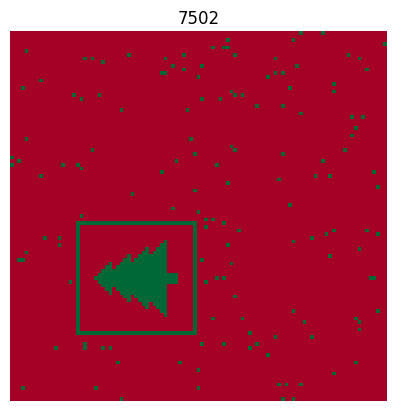

In [10]:
posi = poss
i=0
board = np.zeros(size)
while True:
    i+=1
    posi = (posi + velos) % size
    board[:] = 0
    board[posi[:,0], posi[:,1]] = 1
    if binary_erosion(board).sum()>10:
        break
plt.imshow(board, cmap="RdYlGn")
plt.axis("off")
plt.title(f"{i}");
print(i)